In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Desafio #2

Utilizando as funções de operações lógicas (bitwise) e aritméticas do OpenCV, insira a imagem `opencv-logo.png` dentro da imagem `python.jpg`. O resultado esperado deve ser o que é apresentado na figura abaixo:

**Saída**

![Exemplo de solução](images/desafio2-solucao.png)

**OBS.: Não deixe de dar uma olhada no conteúdo sobre as operações lógicas que está disponível no notebook da Aula 05. Fizemos um exemplo bem parecido durante a aula.**

In [18]:
def plot_img(img, title = "", cmap = None, figsize= (8,6)):
    plt.figure(figsize = figsize)
    plt.imshow(img, cmap = cmap, vmin = 0, vmax = 255)
    plt.title(title, fontdict = {'fontsize': 22})
    plt.xticks([])
    plt.yticks([])

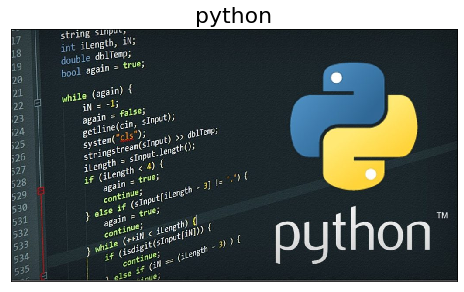

In [19]:
python_img = cv2.imread('images/python.jpg', cv2.IMREAD_COLOR)
python_img = cv2.cvtColor(python_img, cv2.COLOR_BGR2RGB)
plot_img(python_img, 'python')

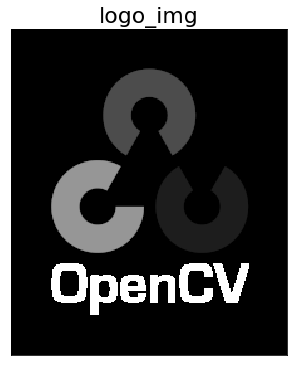

In [20]:
logo_gray = cv2.imread('images/opencv-logo.png', cv2.IMREAD_GRAYSCALE)
plot_img(logo_gray, 'logo_img', cmap = 'gray')

In [28]:
logo_black = np.zeros(python_img.shape[:2], np.uint8)
logo_black[:logo_gray.shape[0],:logo_gray.shape[1]] = logo_gray

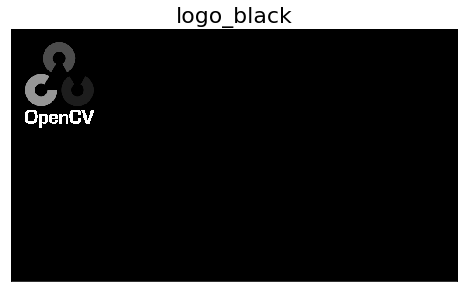

In [29]:
plot_img(logo_black, 'logo_black', cmap = 'gray')

In [36]:
limiar, logo_binary = cv2.threshold(logo_black, 0, 255, cv2.THRESH_BINARY_INV)

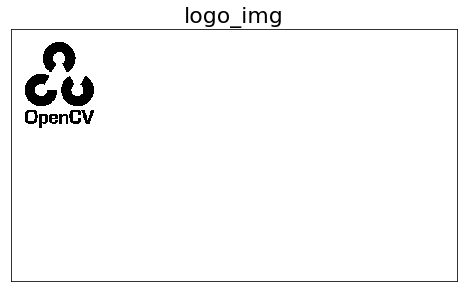

In [37]:
plot_img(logo_binary, 'logo_img', cmap = 'gray')

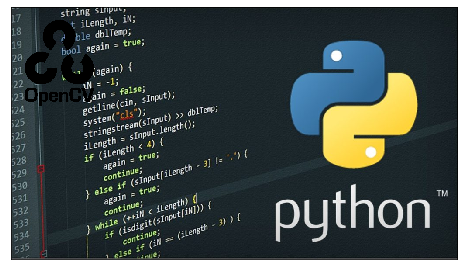

In [38]:
img_color_thresh = cv2.bitwise_and(python_img, python_img, mask = logo_binary)
plot_img(img_color_thresh, cmap = 'gray')

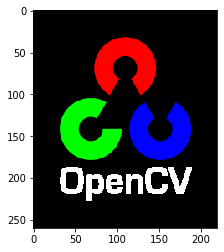

In [39]:
logo_img = cv2.imread('images/opencv-logo.png', cv2.IMREAD_COLOR)
logo_img = cv2.cvtColor(logo_img, cv2.COLOR_BGR2RGB)
plt.imshow(logo_img)

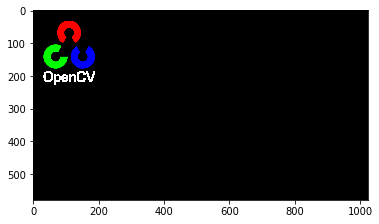

In [40]:
logo_final = np.zeros(python_img.shape, np.uint8)
logo_final[:logo_img.shape[0],:logo_img.shape[1],:] = logo_img
plt.imshow(logo_final)

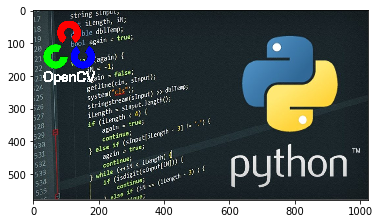

In [41]:
plt.imshow(cv2.add(logo_final, img_color_thresh))